# Importing  Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import nltk

# Loading and Reading Data

In [3]:
data = pd.read_csv('../desktop/dataset/imdb_labelled.txt', sep='\t', header=None, names=['Review', 'Sentiment'])

data.head()

,Review,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [4]:
data.sample(5)

,Review,Sentiment
739,Fans of the genre will be in heaven.,1
293,"This movie creates its own universe, and is fa...",1
250,My 8/10 score is mostly for the plot.,1
261,"This is one I did not have, but I watched it r...",0
731,"If you have not seen this movie, I definitely ...",1


In [5]:
X = data['Review']
y = data['Sentiment']

In [6]:
data.describe()

,Sentiment
count,748.000000
mean,0.516043
std,0.500077
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [7]:
data['Sentiment'].unique()

array([0, 1], dtype=int64)

In [8]:
data['Sentiment'].value_counts()

1    386
0    362
Name: Sentiment, dtype: int64

D:\anoconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

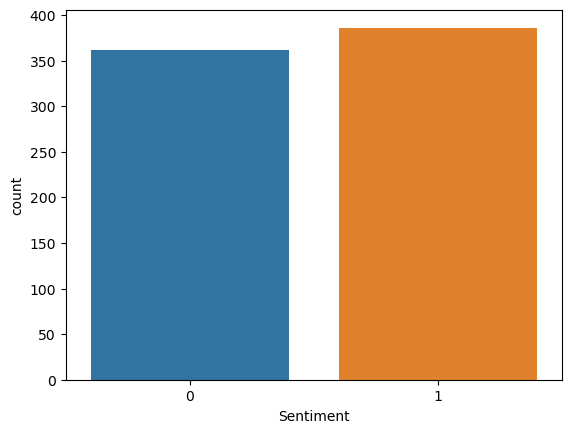

In [9]:
sns.countplot(data['Sentiment'])

In [10]:
X[150]

"It's just lame.  "

In [11]:
y[105]

0

# TF-IDF vectorizer and Count Vectorizer

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [13]:
count_vec = CountVectorizer(stop_words='english',
                           ngram_range=(1,2),
                        lowercase=True,)

In [14]:
'''
tf: total repetition of words
idf : log(document_no / no of document contining x)
tf-idf score tf * idf
'''


tfidf = TfidfVectorizer(tokenizer=nltk.word_tokenize,
                       stop_words='english', ngram_range=(1,2),
                       lowercase=True,
                       max_features=1024,
                       min_df=3)

In [15]:
X_tfidf = tfidf.fit_transform(X)

In [16]:
import joblib
joblib.dump(tfidf, 'tf-idf vectorizer.pkl')

['tf-idf vectorizer.pkl']

In [17]:
X_tfidf.shape

(748, 698)

In [18]:
X.shape

(748,)

# Train Test Split and Model Processing

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [20]:
random_forest = RandomForestClassifier(n_jobs=-1, random_state=666)

In [21]:
X_tfidf_train, X_tfidf_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.1)

In [22]:
random_forest.fit(X_tfidf_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=666)

In [23]:
joblib.dump(random_forest, 'Sentiment_analysis_model.pkl')

['Sentiment_analysis_model.pkl']

In [24]:
y_pred = random_forest.predict(X_tfidf_test)

In [25]:
from sklearn.metrics import  classification_report

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.65      0.66        34
           1       0.71      0.73      0.72        41

    accuracy                           0.69        75
   macro avg       0.69      0.69      0.69        75
weighted avg       0.69      0.69      0.69        75



# Confusion Matrix

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(y_test, y_pred)

array([[22, 12],
       [11, 30]], dtype=int64)

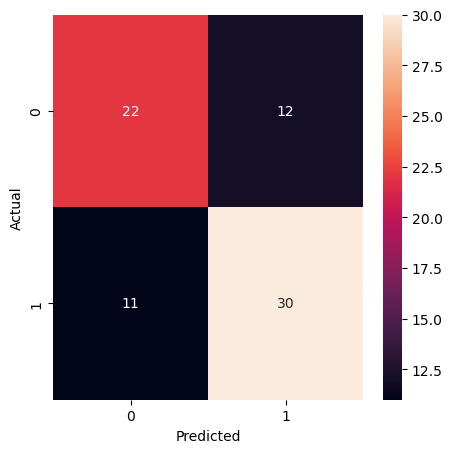

In [29]:
import seaborn as sns
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Prediction

In [32]:
sentences = ['this movie is the best that i have seen so far',
             'it is just to time pass',
             'it is worth to watch',
             'every character in this movie was so great',
             'The movie was not gripping, so I recommend everyone not to watch']

sentences_tfidf = tfidf.transform(sentences)

In [33]:
random_forest.predict(sentences_tfidf)

array([1, 0, 1, 1, 1], dtype=int64)